<a href="https://colab.research.google.com/github/gusair/credit-card-frauds/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection** #

## **Introduction** ##



In this project, we will be taking a look at one of the most harmful cybercrimes in our days: Credit Card Fraud. Credit card fraud refers to the unauthorized usage of someone's credit card information for deceptive purposes. Generally, cybercriminals use one of the following methods:

<img src=https://img2.migalhas.com.br/_MEDPROC_/https__img.migalhas.com.br__SL__gf_base__SL__empresas__SL__MIGA__SL__imagens__SL__2021__SL__04__SL__23__SL__dab36795-6081-4862-be55-e77f8ff9bbce.jpg._PROC_CP65.jpg width=90%>

1. *Phishing* — refers to a social engineering method where cybercriminals attempt to get sensitive information from individuals. Cyber gangs act like legitimate and reliable companies and authorities and use fake messages, emails, and calls to deceive individuals and gain access to their credit card numbers, login credentials, and personal identification details.

2. *Data Breaches* — refers to the illegal access to sensitive databases. These breaches are created due to weak security measures, software vulnerabilities, or even internal negligence.

3. *Card Skimming* — refers to the usage of a small equipment called a "skimmer" that is linked to card readers. This skimmer collects data from the magnetic strip of the card when it is swiped.

4. *Hacking into Online Accounts* — refers to the illegal access to someone's personal or financial accounts on websites/apps. This action uses techniques such as brute force attacks, credential stuffing (using stolen passwords), or exploiting vulnerabilities in the website.

These situations enable cybercriminals to generate great damage to individuals and businesses, involving financial loss, identity theft, reputational damage, legal consequences, and even psychological impact.

Credit card companies face challenges dealing with these fraudulent situations. The massive usage of credit cards leads to increasing opportunities for cybercriminals to commit fraudulent actions. So, it is important for companies to look for solutions on how to recognize fraudulent credit card transactions, protecting their customers from unfair payments for things they did not purchase, avoiding or at least resolving consequences.

In 2022, payment fraud across the European Economic Area (EEA) amounted to €4.3 billion, with card payments accounting for a significant portion of this total. In the first half of 2023, card fraud involving cards issued in the EEA accounted for 0.031% of the total value and 0.015% of the total number of card payments. While specific data for 2024 is not yet available, these figures indicate that credit card fraud remains a notable concern in Europe.

Due to the massive amount of money involved in these crimes and the severe consequences they bring to people, investment in fraud detection has been increasing in recent years. Machine learning algorithms have been doing a good job of detecting fraud, assisting in saving millions.


## **Data Analysis** ##



The dataset we are using in this project contains transactions made by credit cards in September 2013 by European cardholders.

This dataset includes transactions that occurred over two days, with 492 fraud cases out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (fraud cases) accounts for only 0.172% of all transactions.

Furthermore, as we progress with the project, we notice that the dataset is imbalanced, with fraud cases representing only 0.17% of the total transactions.

You can access the full dataset on this [Kaggle page](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). For this project, I have linked the CSV file on Dropbox.

In [ ]:
# install scikit-plot library
!pip install -q scikit-plot

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import interp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix

from imblearn.under_sampling import RandomUnderSampler

# set up charts/ graphs w/ seaborn
sns.set_style('dark')

In [ ]:
# import data to dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(file_path)

In [ ]:
# siz of dataframe
df.shape

(284807, 31)

In [ ]:
# creating test dataframe
test = df.sample(frac=0.15, random_state=0)
# dropping test lines
df = df.drop(test.index)

Now that we have imported all the necessary libraries to complete the project, we have also imported the dataset without the need for further adjustments at this moment. Let's proceed with the Exploratory Analysis and then prepare the Machine Learning model.

## **Exploratory Analysis** ##

In [ ]:
# check 5 first entries
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Looking at the entries, we can see that the variables/columns are numerical, and they are anonymized, or better said, mischaracterized because of the PCA transformation.

Reading the [challenge page on Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), we can see that the variables in the dataset underwent a transformation known as Principal Component Analysis (PCA).

This process enables dimensionality reduction while maintaining the maximum amount of information. By doing so, the algorithm creates a new set of features, called components. In this dataset, the components transformed by PCA are represented as the columns.

The only columns that preserved their original values are Time and Amount. The column "Class" shows our target variable, where:

*   0 means ordinary transaction; and
*   1 means a fraudulent transaction.




In [ ]:
# check statistical summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


So, analyzing the statistical results of the dataset using `describe()`, we can see that the components do not show any apparent discrepancies, including the `Time` variable.

Considering the column `Amount`, we notice that the mean is 88.61, the median is 22, and the standard deviation is 247.65, with a maximum value of 19,656.53. As expected, financial transactions made with credit cards typically involve relatively low amounts.

In [ ]:
# check missing data
df.isnull().sum().max()

0

Using the formula above(`df.isnull`), we can guarantee that this is a clean dataset with no missing entries.

In [ ]:
# check balance of classes
df.Class.value_counts()

,count
Class,
0,241668
1,418


In [ ]:
# check percentage of frauds in the dataset
round((df[df.Class == 1].shape[0] / df.shape[0]) * 100, 3)

0.173

As a confirmation of what we stated at the beginning, fraudulent financial transactions (represented by 1 in the Class variable) account for 0.17% of the total transactions. This means that out of 242,086 transactions, 418 were fraudulent.

We can observe in the following bar chart a sharp discrepancy between the classes. Due to this discrepancy, the performance of our machine learning model may be affected. Therefore, it is necessary to balance the dataset before feeding it into the final classification model.

[]

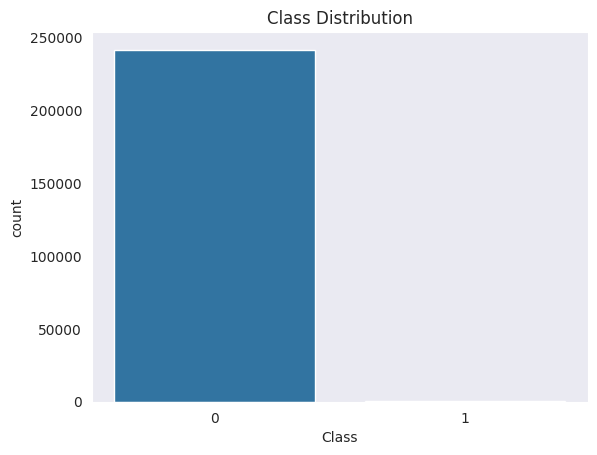

In [ ]:
# plot barchart for classes
fig, ax = plt.subplots()
sns.countplot(x="Class", data=df, ax=ax)
ax.set_title('Class Distribution')
plt.plot()

The graphs below shows the distribution of the classes over time. Howewver, we didi not identify any valuable information.

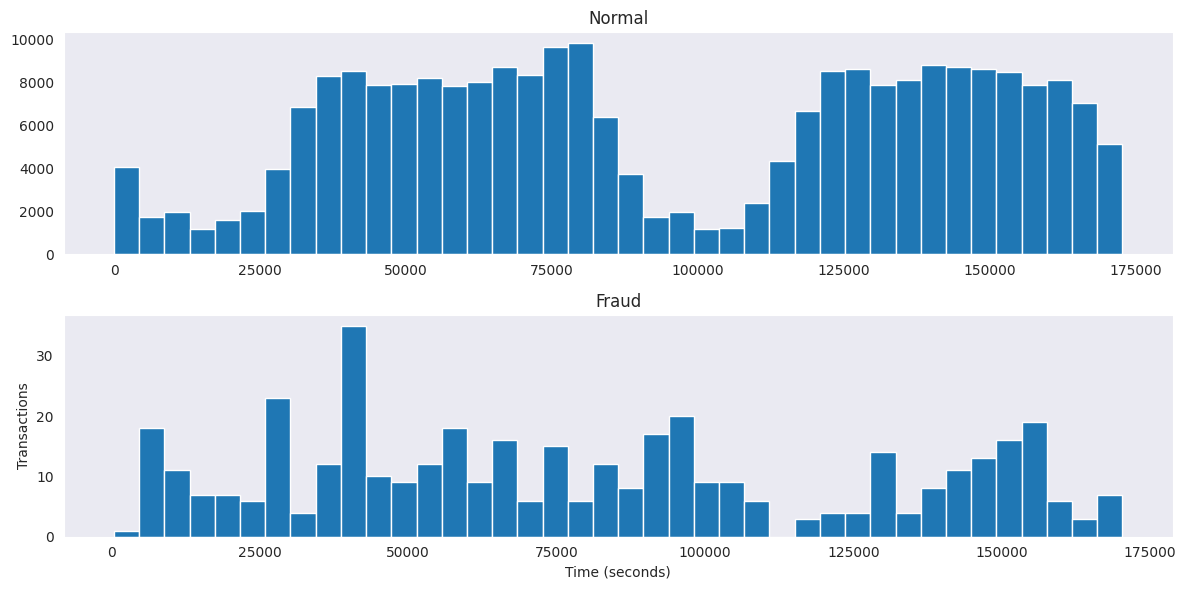

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins=40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraud')

plt.xlabel('Time (seconds)')
plt.ylabel('Transactions')
plt.tight_layout()

Here, you can see the boxplots and check if there is a difference in the transactions in relation to `Amount`.

The distribution is different for the classes, which may contribute to the training of the machine learning model.

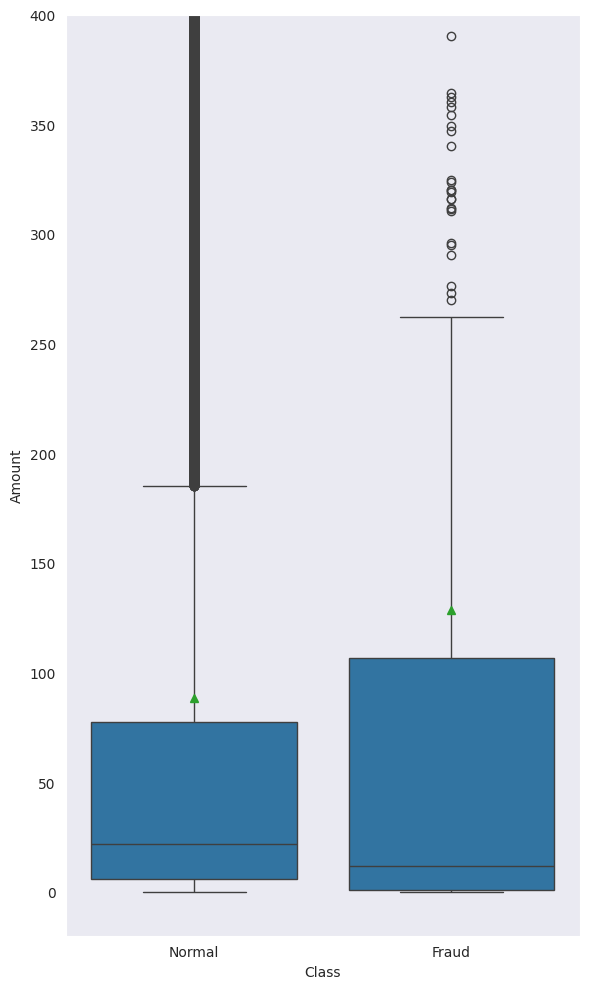

In [ ]:
# plot boxplots for Amount

fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(x='Class', y='Amount', data=df, showmeans=True)
plt.ylim((-20, 400))
plt.xticks([0,1],['Normal', 'Fraud'])

plt.tight_layout()

The statistics for `df.Class == 1` show that the mean is exactly 123.70, and the median is 11.40.

In [ ]:
df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()

,Amount
count,417.000000
mean,123.706859
std,249.477727
min,0.000000
25%,1.000000
50%,11.400000
75%,106.550000
max,1809.680000


<ipython-input-15-982ae72dbb70>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
<ipython-input-15-982ae72dbb70>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
<ipython-input-15-982ae72dbb70>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
<ipython-input-15-982ae72dbb70>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_1[col], label="Class 1", shad

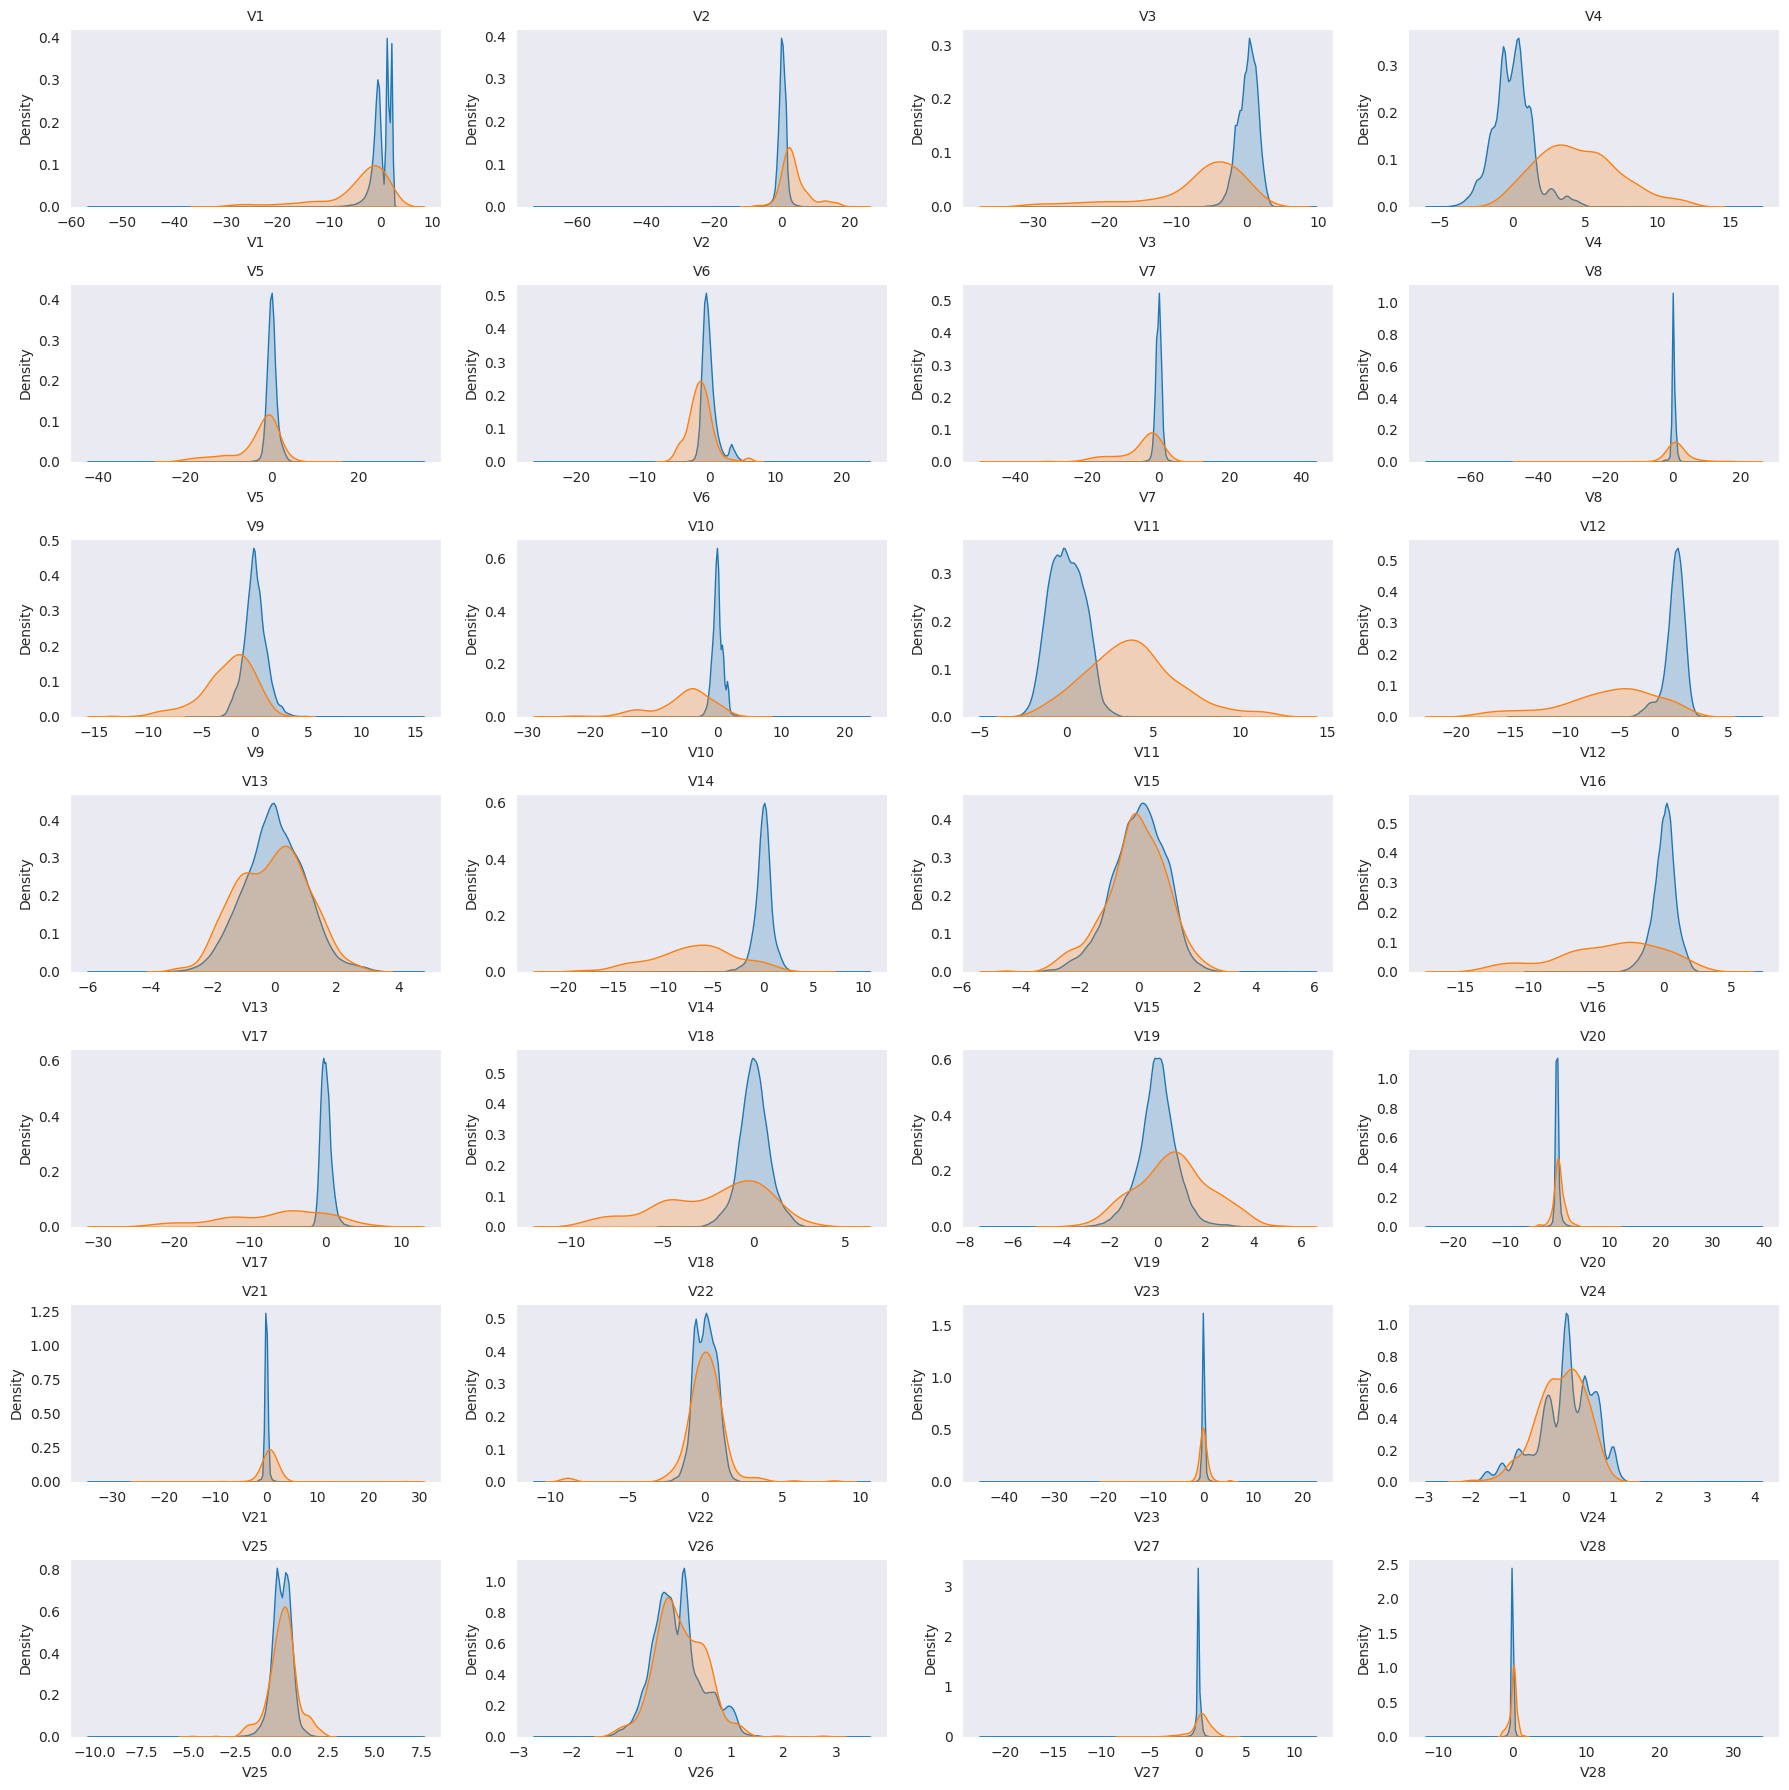

In [ ]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout();

Finalizing our exploratory analysis, we confirm that:

* The dataset is unbalanced due to the minimal number of fraudulent transactions, which represent only 0.17% of the total transactions.
* There are no null values in this dataset.
* The columns Time and Amount are not yet normalized.



## **Data Preparation** ##

In this phase of data preparation, we will organize the data so it can be used for the linear regression model we are building. We will:

* Standardize `Time` and `Amount`.
* Split the data into training and test sets.
* Balance the dataset to prevent underperformance for Class 1 and overfitting.

### **Standarzing `Time` and `Amount`** ###

Credit card financial transactions are generally small amounts. As we mentioned in the exploratory analysis phase, the maximum amount in this dataset was 19,656.53, which is significantly higher than typical credit card financial transactions. This suggests the presence of outliers that could influence our final analysis.

Therefore, we will standardize the `Amount` using `StandardScaler( )`.

In [ ]:
# standardize columns Time and Amount
df_clean = df.copy()

std_scaler = StandardScaler()

df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# check first entries
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


### **Split Between Training and Validation** ###

Before balancing the dataset, we want to ensure that the training and validation sets maintain the same class proportions. To achieve this, we use `stratify=True`.

In [ ]:
# separate variables between X and y
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# split dataset between train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

### **Dataset Balance** ###

We balanced the dataset using the imblearn library and the undersampling technique, eliminating the initial class imbalance.

In [ ]:
# use under-sampling tecnique
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [ ]:
# check classes balance
pd.Series(y_rus).value_counts()

,count
Class,
0,313
1,313


Now, with a balanced dataset, the correlation between the variables becomes clearer.

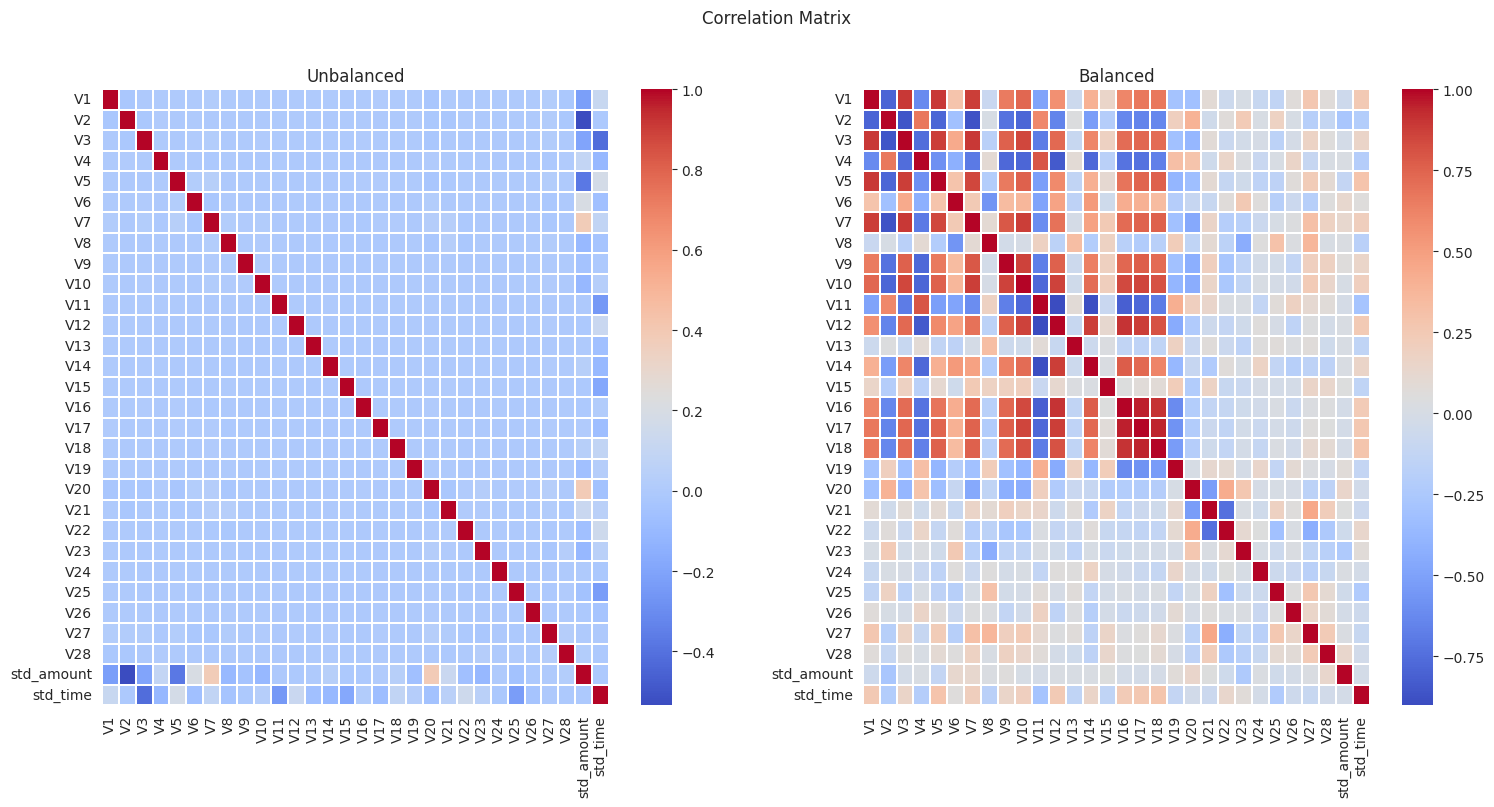

In [ ]:
# plot correlation matrix
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Correlation Matrix')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Unbalanced')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanced')

plt.show()

## **Machine Learning  Model** ##

Now that we have prepared the dataset and completed an exploratory analysis, we will build a classifier using Logistic Regression.

The Machine Learning model will be trained on `X_rus` and `y_rus`. Following that, we will make predictions.

In [ ]:
# train logistics regression
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# predictions over the test
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

Now, we will check the performance of the Machine Learning model using both accuracy and AUC ROC. Accuracy may not be ideal in this case, as we originally had an unbalanced dataset, and accuracy is not always the best measure of efficacy. We can better assess efficacy using the AUC ROC.

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9768    0.9882     60417
           1     0.0623    0.8857    0.1165       105

    accuracy                         0.9767     60522
   macro avg     0.5311    0.9313    0.5523     60522
weighted avg     0.9982    0.9767    0.9867     60522

Acurácia: 0.9767

AUC: 0.9313



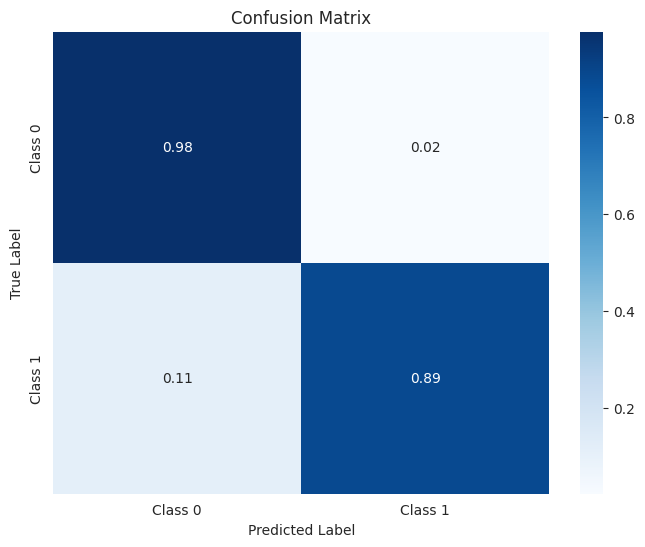

In [ ]:
# generate a confusion matrix
cm = confusion_matrix(y_val, y_pred, normalize="true")

# print classification reports
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))

# print accuracy score
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# print area un der curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

# plot using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## **Making Predictions on the Test Set** ##

In order to make predictions with the new dataset, we will use the model that we already trained. We will need to standardize the "Amount" and "Time" columns without balancing the dataset, as that would lead to a loss of information. We need to make predictions for all rows in the dataset.

In [ ]:
# standartize colums time and amount - test
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount']. values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Separating variables between X and y and make prediction based on test.

In [ ]:
# Separate variables between X and y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

In [ ]:
# make prediction based on test
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Now, let's visualize the results.

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9761    0.9879     42647
           1     0.0643    0.9459    0.1205        74

    accuracy                         0.9761     42721
   macro avg     0.5321    0.9610    0.5542     42721
weighted avg     0.9983    0.9761    0.9864     42721

Acurácia: 0.9761

AUC: 0.9610



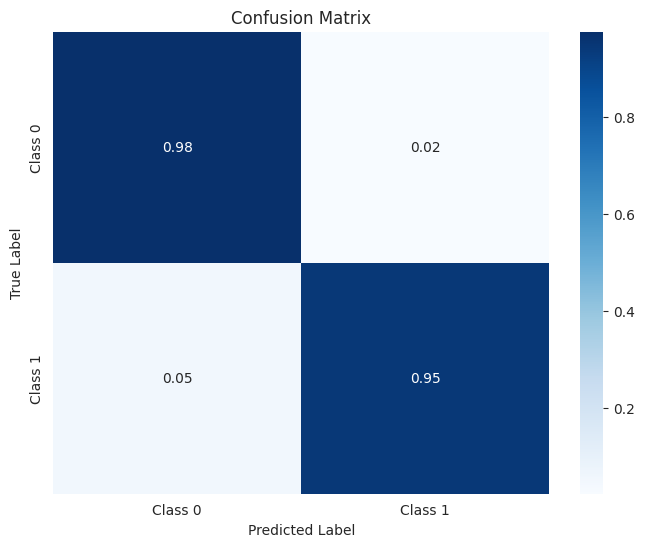

In [ ]:
# generate a confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize="true")

# print classification reports
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# print accuracy score
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# print area un der curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plot using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The results were slightly lower than the ones from the validation set, which can still be considered a good outcome.

## **Final Notes** ##

This was the first machine learning model created by Augusto de Jesus. The project is part of a learning-by-doing process, with a focus on studying data cleaning, exploratory analysis, dataset balancing, PCA transformation, and initial practices with classification algorithms.